In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [24]:
X = load_boston().data
Y = load_boston().target
df=pd.DataFrame(X)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=4)

# applying column standardization on train and test data

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,50.0


In [26]:
#SGD implementation for linear regression
#function having parameter X_train,y_train,no of iteration,learning rate r
#intialising no of iteration=100,learning rate =0.01
#batch size=20



W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,100,0.01,20 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,13)),0
    data=df_train.sample(20) #sampling random k=batch size=20 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
print(W)
print(B)
        


[[-0.7456527   0.33258876 -0.9033079   1.27977485 -0.50364535  2.85330358
  -0.45247558 -1.66385342  0.46503428 -0.57607694 -1.58279544  0.80444299
  -2.7677709 ]]
[19.30584673]


In [27]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))
   

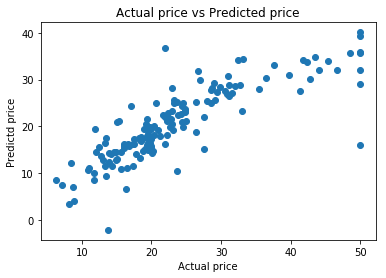

In [28]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [29]:
MSE_lr=mean_squared_error(y_test,y_predic_lr)
print('mean squared error =',MSE_lr)

mean squared error = 40.2921236433462


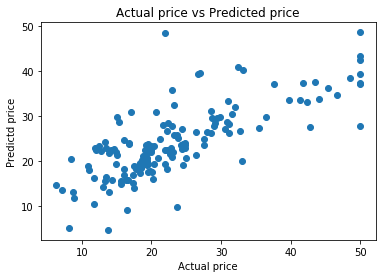

In [30]:
#SGD regression sklearn implementation

#intialising no of iteration=100,eta0=1
#taking t=2 and power_t=1 such that for each iteration eta0=eta0/pow(2,1) ,it means half each times

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,n_iter=100,max_iter=100)
model.fit(X_train,y_train)
y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [31]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 44.81503660276777


In [32]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
print('Weight obtained from manual implementation :-')
print(W)
print('Intercept obtained from manual implementation: -')
print(B)
print('-'*50)

print('Weight obtained from SGD sklearn implementation :-')

print(model.coef_)
print('Intercept obtained from SGD sklearn implementation :-')
print(model.intercept_)

Weight obtained from manual implementation :-
[[-0.7456527   0.33258876 -0.9033079   1.27977485 -0.50364535  2.85330358
  -0.45247558 -1.66385342  0.46503428 -0.57607694 -1.58279544  0.80444299
  -2.7677709 ]]
Intercept obtained from manual implementation: -
[19.30584673]
--------------------------------------------------
Weight obtained from SGD sklearn implementation :-
[-0.71671665  0.91519757  0.40631282  2.04958704 -1.27000491  2.50515604
  0.11248934 -3.69792893  3.59423607 -2.00938862 -1.51199177  0.85435182
 -3.89487741]
Intercept obtained from SGD sklearn implementation :-
[22.70805306]


In [33]:
#comparison between MSE of own implementation and SGD sklearn implementation
print('MSE of manual implementation = ',MSE_lr)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_sgd)


MSE of manual implementation =  40.2921236433462
--------------------------------------------------
MSE of SGD sklearn implementation =  44.81503660276777


Procedure and Observation:-
* First we splitted whole dataset into train and test and then standardised it
* Then After we initialised learning rate to constant and equal to 0.01 , no of iteration to 100 and took       batch size(k) =20
* After that we calculated partial derivative w.r.t w and b in each iteration of batch size till wk+1 nearly     equal to wk.
* Then we predicted y_test and plotted scatter plot between actual y and predicted y and then we calculated     mean squared error.
* In our next step we applied SGD regressor in sklearn and compared weight ,mean squared error and scatter       plot with own implementation.
* And we observed that weights , scatter plots and mean squared error were nearly equal.
